# The Power of Data: Revealing Insights and Pitfalls in Data Analysis - ChatGPT Tweets

In [2]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Concatenate, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


df = pd.read_csv('chatgpt_daily_tweets.csv')
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.lower()

df['cleaned_text'] = df['text'].apply(clean_text)
df = df[df['lang'] == 'en']

max_len = 100
max_words = 10000

tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=max_len)

from textblob import TextBlob
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment_polarity'] = df['cleaned_text'].apply(get_sentiment_polarity)
df['sentiment'] = np.where(df['sentiment_polarity'] >= 0, 'positive', 'negative')

In [3]:
df.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_location,user_description,...,user_tweet_count,user_verified,source,retweet_count,like_count,reply_count,impression_count,cleaned_text,sentiment_polarity,sentiment
2,1.6427385624866693e+18,2023-04-03 03:59:28+00:00,2023-04-08 01:06:52.504868,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,pk,pradeep42329225,India,💐💐।।जय श्री महाकाल।।💐💐,...,3816.0,False,NaN,628.0,0.0,0.0,0.0,rt chatgpt plugins are the fastest way to get...,0.375000,positive
3,1.6429198880616448e+18,2023-04-03 15:59:59+00:00,2023-04-08 01:07:04.742617,Get an intelligent chatbot for your website in...,en,1633040597782081537,AR Leyva,ArrheniusLey,United Kingdom,Passionate about AI and its potential to trans...,...,198.0,False,NaN,0.0,0.0,0.0,58.0,get an intelligent chatbot for your website in...,0.411111,positive
4,1.642708351690711e+18,2023-04-03 01:59:25+00:00,2023-04-08 01:06:50.638068,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1311403370670960640,Human Being 🇨🇳🇸🇬🇻🇳,KiarostamiBeing,"Chicago, IL",Freedom is the Recognition of Necessity • Mark...,...,12949.0,False,NaN,0.0,0.0,0.0,0.0,hey guys has launched at just 55000 usd mark...,0.000000,positive
5,1.6428593561893274e+18,2023-04-03 11:59:28+00:00,2023-04-08 01:07:00.375167,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,en,462142717,MokoHaram,holymoko,Zambia mufulira,Public faker🍂,...,20438.0,False,NaN,270.0,0.0,0.0,0.0,rt now join datalandchatgpt \n32346\ntasks\n...,0.000000,positive
9,1.6428744495305933e+18,2023-04-03 12:59:26+00:00,2023-04-08 01:07:01.437161,The plagiarism detector will introduce its #AI...,en,896094324341039104,Dr. Susan D'Agostino,susan_dagostino,"New Hampshire, USA",Tech reporter @insidehighered. Mathematician. ...,...,3320.0,True,NaN,7.0,22.0,1.0,5769.0,the plagiarism detector will introduce its de...,0.200000,positive


In [4]:
df["sentiment"].value_counts()

positive    17414
negative     3131
Name: sentiment, dtype: int64

<Axes: title={'center': 'Sentiment Analysis for tweets about Chatgpt'}, ylabel='sentiment'>

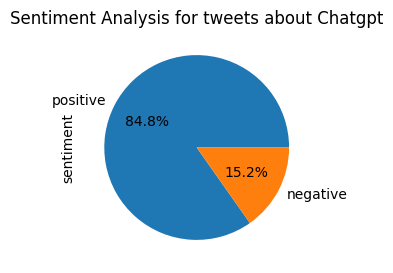

In [5]:
df["sentiment"].value_counts().plot(kind='pie', autopct='%1.1f%%',title="Sentiment Analysis for tweets about Chatgpt",figsize=(3,3))


In [6]:
print("The Percentage of good reviews about ChatGPT are: ", str(int((len(df[df["sentiment"] == "positive"])/len(df))*100)) + "%")

The Percentage of good reviews about ChatGPT are:  84%


## Based on the last plot, It can be advertised that 84% of people have good feelings about Chatgpt!

In [7]:
df["tweet_created"].max()

'2023-05-12 23:59:59+00:00'

In [8]:
df["tweet_created"].min()

'2023-04-03 00:59:16+00:00'

In [9]:
# Misleading Sentiment Analysis

In [10]:
df[["cleaned_text","sentiment_polarity",	"sentiment"]]

,cleaned_text,sentiment_polarity,sentiment
2,rt chatgpt plugins are the fastest way to get...,0.375000,positive
3,get an intelligent chatbot for your website in...,0.411111,positive
4,hey guys has launched at just 55000 usd mark...,0.000000,positive
5,rt now join datalandchatgpt \n32346\ntasks\n...,0.000000,positive
9,the plagiarism detector will introduce its de...,0.200000,positive
...,...,...,...
66363,rt wtf seriously a very serious question pose...,-0.244444,negative
66364,is googles updated bard chatgpts strongest co...,0.000000,positive
66368,rt chatgpt has now a big problem\n\ngoogle ju...,-0.088889,negative
66371,rt all chatgpt plus users getting browsing an...,0.200000,positive


## To do:

* Misleading Sentiment Analysis:
Investigate cases where incorrect sentiment analysis techniques are applied to the ChatGPT-related tweets. Analyze how inaccurate sentiment analysis can lead to misinterpretations of the overall sentiment, potentially influencing decision-making based on flawed sentiment analysis results.

* Spurious Correlations:
Explore instances where incorrect statistical methods lead to spurious correlations among the ChatGPT-related tweets. Identify examples where two variables seem correlated but are not causally related, highlighting how misinterpreting such correlations can lead to erroneous conclusions and decision-making.

* Statistical Significance Misuse:
Examine cases where incorrect application or interpretation of statistical significance tests are applied to the ChatGPT-related tweets dataset. Analyze how the misuse of significance tests, such as p-values or hypothesis testing, can lead to false claims or unwarranted decisions based on statistical significance.

* Sampling Bias in ChatGPT Data:
Investigate potential biases in the ChatGPT-related tweets dataset, such as selection bias or coverage bias. Analyze how such biases can affect the generalizability of the findings and influence decision-making based on skewed or unrepresentative data.

* Misrepresentation in Visualizations:
Analyze instances where misleading visualizations or data representations are used in ChatGPT-related discussions. Investigate how distorted or misrepresented visualizations can mislead interpretations, leading to incorrect conclusions and potentially impacting decision-making processes.

* Unvalidated NLP Techniques:
Explore the consequences of using unvalidated or flawed NLP techniques in analyzing the ChatGPT-related tweets. Investigate scenarios where incorrect text processing, sentiment analysis algorithms, or topic modeling methods are applied, leading to unreliable results and potentially flawed decision-making.

* Overreliance on Outliers:
Examine cases where outliers or extreme observations in the ChatGPT-related tweets dataset are given undue influence or misinterpreted. Analyze how overreliance on outliers can lead to biased conclusions and decisions that do not accurately represent the overall trends or patterns in the data.



## Misleading Sentiment Analysis

In [11]:
pd.DataFrame(df["sentiment_polarity"].value_counts()).reset_index()[0:20]

,index,sentiment_polarity
0,0.000000,7370
1,0.500000,1082
2,0.400000,551
3,0.250000,523
4,0.200000,471
5,0.136364,361
6,0.300000,330
7,0.100000,317
8,1.000000,263
9,-0.200000,224


<Axes: title={'center': 'Sentiment polarity for tweets about Chatgpt'}, xlabel='index'>

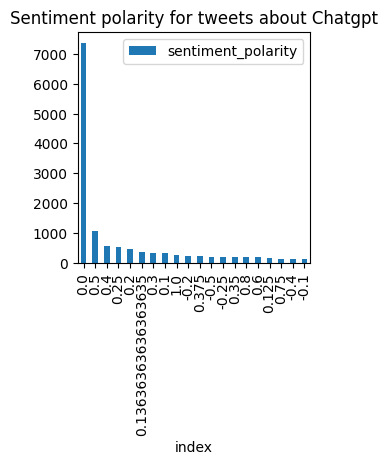

In [12]:
pd.DataFrame(df["sentiment_polarity"].value_counts()).reset_index()[0:20].plot(kind='bar',x='index',y='sentiment_polarity',title="Sentiment polarity for tweets about Chatgpt",figsize=(3,3))


In [13]:
from tabulate import tabulate
# pd.set_option('display.max_colwidth', 10)
pd.set_option('display.max_colwidth', 20)


table = tabulate(df[df["sentiment_polarity"]==0.0][["sentiment","sentiment_polarity","text"]][60:70], headers=['sentiment','sentiment_polarity','Sentences'], tablefmt='fancy_grid')
print(table)


╒═════╤═════════════╤══════════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│     │ sentiment   │   sentiment_polarity │ Sentences                                                                                                                                                                                                                                       │
╞═════╪═════════════╪══════════════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ 307 │ positive    │                    0 │ RT @AngryTomtweets: 15 AI tools for solopreneurs:                                             

 ## **Based on the provided table, it becomes evident that the sentiment analysis results are misleading. This is due to the fact that a sentiment polarity score of 0 is considered positive, whereas upon closer examination of the corresponding text, it is apparent that the sentiment is actually neutral or even irrelevant.**

In [14]:
print("The length of the dataset: " + str(len(df)))
print("The count of tweets with zero sentiment polarity (Neutral sentiments): " + str(len(df[df["sentiment_polarity"]==0.0])))

print("The percentage of tweets with zero sentiment polarity (Neutral sentiments): " + str(int(len(df[df["sentiment_polarity"]==0.0])/len(df)*100))+"%")


The length of the dataset: 20545
The count of tweets with zero sentiment polarity (Neutral sentiments): 7370
The percentage of tweets with zero sentiment polarity (Neutral sentiments): 35%


In [15]:
df = df[df["sentiment_polarity"] != 0.0]

In [16]:
df["sentiment"].value_counts()

positive    10044
negative     3131
Name: sentiment, dtype: int64

<Axes: title={'center': 'Sentiment Analysis for tweets about Chatgpt'}, ylabel='sentiment'>

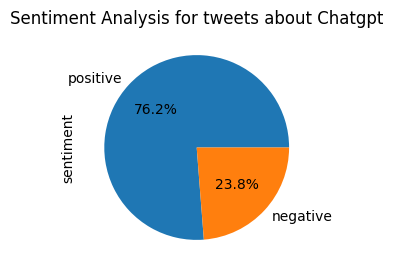

In [17]:
df["sentiment"].value_counts().plot(kind='pie', autopct='%1.1f%%',title="Sentiment Analysis for tweets about Chatgpt",figsize=(3,3))



# After Droping the misclassified sentiments, the percentage of good reviews decreased to be 76%!


---






# Sampling Bias in ChatGPT Data:
The data biases can affect the generalizability of the findings and influence decision-making based on skewed or unrepresentative data.


In [18]:
df["user_location"].value_counts()[50:80]

東京都                        13
Abuja, Nigeria             13
California                 13
Miami, FL                  13
Berlin, Germany            13
Malaysia                   13
Berlin                     13
Mexico                     13
Philadelphia, PA           13
New Delhi, India           12
日本 東京                      12
Kenya                      12
Bengaluru, India           12
Houston, TX                12
San Francisco              11
Florida, USA               11
Chicago                    11
Dallas, TX                 11
Worldwide                  11
Montréal, Québec           11
Brasil                     11
Manchester, UK             11
Colombia                   11
España                     11
London, UK                 10
Ireland                    10
Atlanta, GA                10
Cape Town, South Africa    10
Dubai                      10
São Paulo, Brasil          10
Name: user_location, dtype: int64

In [19]:
df[df["user_location"] == "Chicago"]["sentiment"].value_counts()

positive    10
negative     1
Name: sentiment, dtype: int64

In [20]:

df[df["user_location"] == "Brooklyn, NY"]["sentiment"].value_counts()

negative    10
positive     5
Name: sentiment, dtype: int64

# Misleading Conclusion: If we only considered the sentiment distribution within the subset of reviews from Chicago, it might lead to a potentially misleading conclusion that the majority of people in Chicago have positive reviews about ChatGPT (90% positive sentiment). However, this conclusion should be approached with caution due to the following factors.

1. Sample Size: The total count of reviews from users in Chicago is only 11, which represents a very small portion (0.05%) of the entire dataset. Drawing broad conclusions based on such a small sample size may not be representative of the overall sentiment of people in Chicago or the general population.

2. Limited Generalizability: It's important to recognize that the sentiment distribution among users in Chicago may not reflect the sentiment of users from other locations or the broader user base. Therefore, making decisions solely based on this subset of reviews from Chicago may result in inaccurate generalizations.

In summary, while the sentiment distribution among Chicago users appears to be predominantly positive, the small sample size and limited generalizability highlight the need for a cautious interpretation. It emphasizes the importance of using appropriate statistical methods, considering larger and more representative datasets, and avoiding making sweeping conclusions based on limited or biased samples.

from the above table we can tell that all the reviews

In [21]:
df[['user_location'	,'sentiment','tweet_id']].groupby(['user_location','sentiment']).count().reset_index().sort_values(by="tweet_id",ascending = False)[59:63]

,user_location,sentiment,tweet_id
742,Chicago,positive,10
683,"Cape Town, South...",positive,10
584,"Brooklyn, NY",negative,10
653,California,positive,10


## Duplicate Data is misleading

In [22]:
# df[df["cleaned_text"].duplicated()][0:10]
df[df.text.str.startswith('RT', na=False)][1:5]

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_location,user_description,...,user_tweet_count,user_verified,source,retweet_count,like_count,reply_count,impression_count,cleaned_text,sentiment_polarity,sentiment
11,1.64279894164441...,2023-04-03 07:59...,2023-04-08 01:06...,RT @cz_binance: ...,en,2962446790,🤨Anthony👽,doganruzgar77,NaN,NaN,...,46.0,False,NaN,4009.0,0.0,0.0,0.0,rt chatgpt gt f...,0.200000,positive
15,1.64284438609750...,2023-04-03 10:59...,2023-04-08 01:06...,RT @JakeSucky: T...,en,1146047167284547586,CatalinZ,qCatalinZ,NaN,aw shit | wardog,...,857.0,False,NaN,504.0,0.0,0.0,0.0,rt these guys a...,0.333333,positive
16,1.64293487988413...,2023-04-03 16:59...,2023-04-08 01:07...,RT @jessicard: i...,en,19026321,Jay Spanton,Spanty,"Kingsbridge, Devon",Researcher/ desi...,...,5568.0,False,NaN,7655.0,0.0,0.0,0.0,rt i hooked up ...,-0.700000,negative
17,1.64273859794083...,2023-04-03 03:59...,2023-04-08 01:06...,RT @jbrowder1: I...,en,4587704414,Gian Marcos,GianMarcosMer,NaN,Web Designer in ...,...,20564.0,False,NaN,1730.0,0.0,0.0,0.0,rt i asked the ...,0.136364,positive


In [94]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['tweet_id', 'tweet_created', 'tweet_extracted', 'text', 'lang',
       'user_id', 'user_name', 'user_username', 'user_location',
       'user_description', 'user_created', 'user_followers_count',
       'user_following_count', 'user_tweet_count', 'user_verified', 'source',
       'retweet_count', 'like_count', 'reply_count', 'impression_count',
       'cleaned_text', 'sentiment_polarity', 'sentiment', 'date',
       'transformers_setniemnt', 'transformers_setniemnt_score',
       'bigram_text'],
      dtype='object')

## From the above table we can see that there are more than 10 rows having the same text because they are mainly just a retweet! which also affects our analysis for the total sentiment analysis about chatgpt.

In [23]:
#Count of Retweets per sentiment
df[df.text.str.startswith('RT', na=False)]["sentiment"].value_counts()

positive    6451
negative    2089
Name: sentiment, dtype: int64

In [24]:
df[['retweet_count'	,'like_count','reply_count',	'impression_count','sentiment']].groupby(['sentiment']).agg(['sum'])

,retweet_count,like_count,reply_count,impression_count
,sum,sum,sum,sum
sentiment,,,,
negative,4436925.0,13076.0,1241.0,2002592.0
positive,8673445.0,34631.0,5545.0,6612939.0


In [25]:
df = df.drop_duplicates( "text" , keep='first')

<Axes: title={'center': 'Sentiment Analysis for tweets about Chatgpt'}, ylabel='sentiment'>

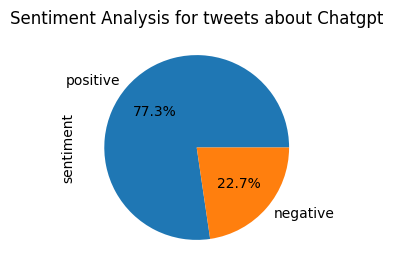

In [26]:
df["sentiment"].value_counts().plot(kind='pie', autopct='%1.1f%%',title="Sentiment Analysis for tweets about Chatgpt",figsize=(3,3))


In [27]:
# df[['retweet_count'	,'like_count','reply_count',	'impression_count','sentiment']].groupby(['sentiment']).agg(['sum'])

In [28]:
df["sentiment"].value_counts()

positive    6010
negative    1762
Name: sentiment, dtype: int64

### Topic Modeling:
Analyze Negative Sentiments: Investigate the factors contributing to negative sentiments towards ChatGPT, providing insights on areas for improvement or addressing specific concerns raised by users.


In [29]:
!pip install altair_viewer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 844.5/844.5 kB 13.4 MB/s eta 0:00:00


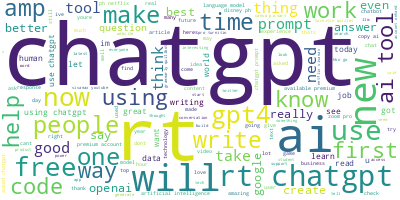

In [31]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['cleaned_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


In [32]:

import pandas as pd
import nltk
nltk.download('punkt')

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel

# Load the stopwords
stop_words = set(stopwords.words('english'))

# Load the tweets from the DataFrame
tweets = df['cleaned_text'].tolist()

# Tokenize the tweets
tokenized_tweets = [word_tokenize(tweet.lower()) for tweet in tweets]

# Remove stopwords and words with length less than 3
tokenized_tweets = [[word for word in tweet if word.isalnum() and len(word) > 2 and word not in stop_words] for tweet in tokenized_tweets]

# Create a dictionary representation of the tokenized tweets
# dictionary = corpora.Dictionary(tokenized_tweets)

# # Convert the tokenized tweets into a document-term matrix
# corpus = [dictionary.doc2bow(tweet) for tweet in tokenized_tweets]

# # Set the number of topics to be detected
# num_topics = 5

# # Build the LDA model
# lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# # Print the topics and their corresponding keywords
# topics = lda_model.print_topics(num_topics=num_topics)
# for topic in topics:
#     print(topic)

# # Compute the coherence score for the model
# coherence_model = CoherenceModel(model=lda_model, texts=tokenized_tweets, dictionary=dictionary, coherence='c_v')
# coherence_score = coherence_model.get_coherence()
# print(f"Coherence Score: {coherence_score}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install pyLDAvis
!pip install gensim


In [35]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pyLDAvis==2.1.2


In [37]:
# # import pyLDAvis
# # import pyLDAvis.gensim_models as gensimvis
# # import matplotlib.pyplot as plt
# # id2word = corpora.Dictionary(tokenized_tweets)
# # corpus = [id2word.doc2bow(text) for text in tokenized_tweets]

# # lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
# #                                            id2word=id2word,
# #                                            num_topics=20,
# #                                            random_state=100,
# #                                            update_every=1,
# #                                            chunksize=100,
# #                                            passes=10,
# #                                            alpha='auto',
# #                                            per_word_topics=True)

# # # Generate the visualization
# # vis = gensimvis.prepare(lda_model, corpus, id2word)
# # pyLDAvis.enable_notebook()

# # # Create the interactive plot
# # fig = plt.figure(figsize=(10, 8))
# # pyLDAvis.display(vis)

# # # Show the plot
# # plt.show()

# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis
# import matplotlib.pyplot as plt
# from gensim import corpora

# id2word = corpora.Dictionary(tokenized_tweets)
# corpus = [id2word.doc2bow(text) for text in tokenized_tweets]

# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20,
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True)

# vis = gensimvis.prepare(lda_model, corpus, id2word)
# pyLDAvis.enable_notebook()

# # Create the interactive plot
# pyLDAvis.display(vis)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sentiment Trend Analysis: Track sentiment over time to identify any changes or patterns in public perception towards ChatGPT, allowing for a better understanding of its evolving reception.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


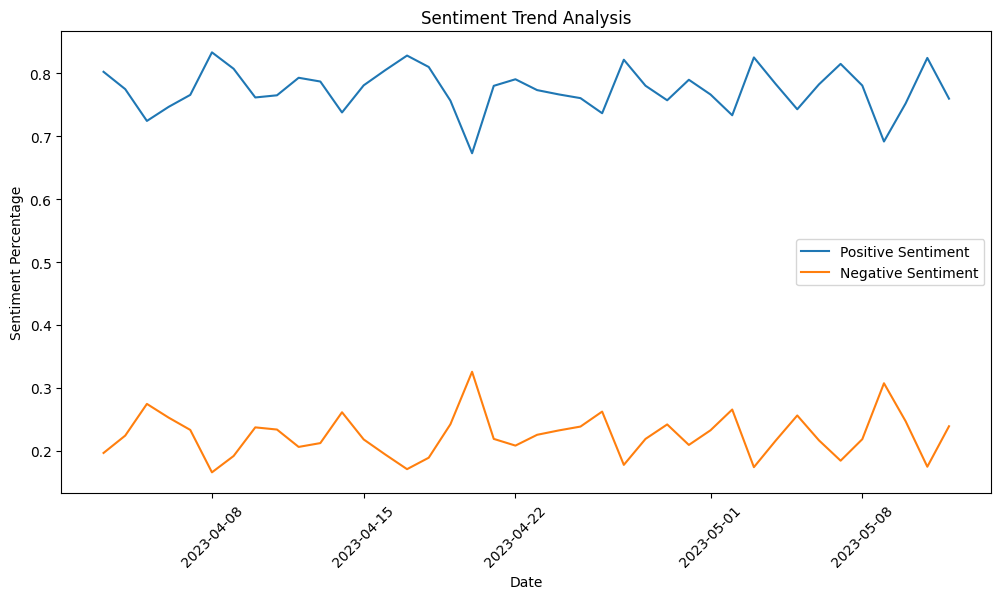

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['tweet_created'])

# Group the data by date and calculate the average sentiment for each day
# sentiment_trend = df.groupby(df['date'].dt.date)['sentiment_polarity'].mean()
sentiment_counts = df.groupby([df['date'].dt.date, 'sentiment']).size().unstack(fill_value=0)

# Calculate the percentage of positive and negative sentiments
sentiment_counts['positive_percentage'] = sentiment_counts['positive'] / sentiment_counts.sum(axis=1)
sentiment_counts['negative_percentage'] = sentiment_counts['negative'] / sentiment_counts.sum(axis=1)

# Plot the sentiment trends over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_counts.index, sentiment_counts['positive_percentage'], label='Positive Sentiment')
plt.plot(sentiment_counts.index, sentiment_counts['negative_percentage'], label='Negative Sentiment')
plt.xlabel('Date')
plt.ylabel('Sentiment Percentage')
plt.title('Sentiment Trend Analysis')
plt.xticks(rotation=45)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


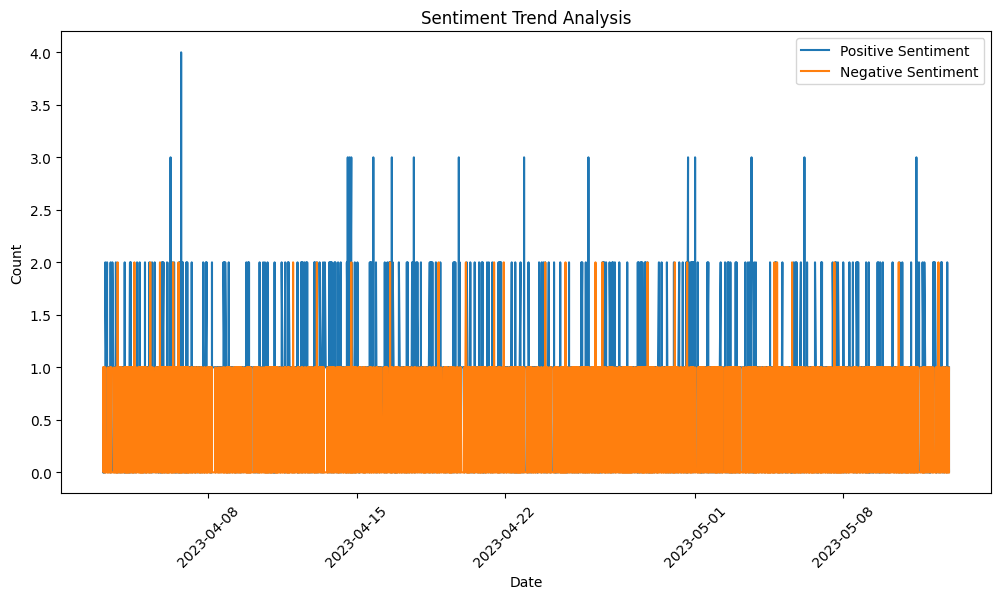

In [39]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['tweet_created'])

sentiment_counts = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment trends over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_counts.index, sentiment_counts['positive'], label='Positive Sentiment')
plt.plot(sentiment_counts.index, sentiment_counts['negative'], label='Negative Sentiment')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment Trend Analysis')
plt.xticks(rotation=45)
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


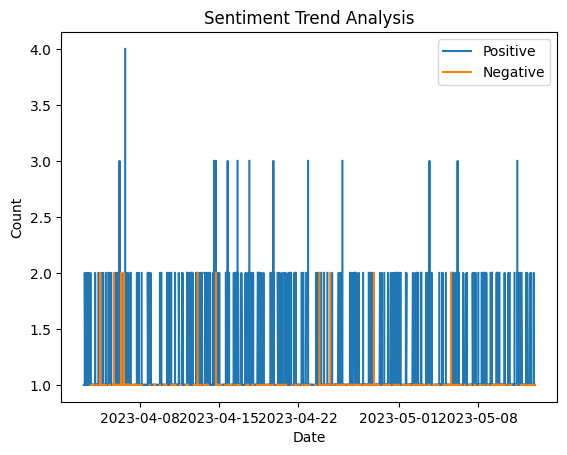

In [40]:
sentiment_counts = df.groupby(['date', 'sentiment']).size().unstack()

# Create line plots for positive and negative sentiment
plt.plot(sentiment_counts.index, sentiment_counts['positive'], label='Positive')
plt.plot(sentiment_counts.index, sentiment_counts['negative'], label='Negative')

# Set the x-axis label and title
plt.xlabel('Date')
plt.title('Sentiment Trend Analysis')

# Set the y-axis label
plt.ylabel('Count')

# Add a legend
plt.legend()

# Show the plot
plt.show()

we can see that this plot is awful and hard to understand

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


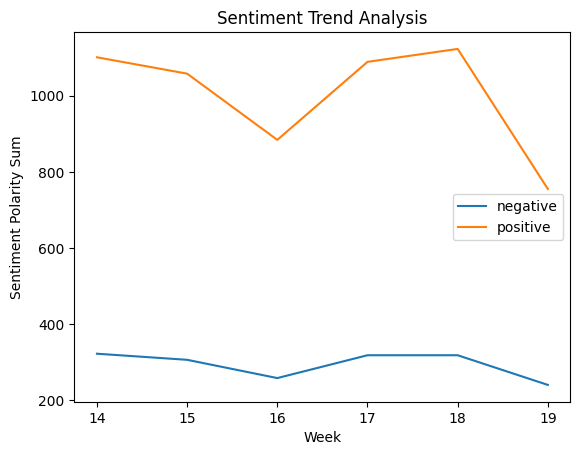

In [41]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

sentiment_counts  = df.groupby(['sentiment', df['tweet_created'].dt.strftime('%W')])['sentiment_polarity'].count().unstack()
sentiment_counts.T.plot(kind='line')

# Set the x-axis label and title
plt.xlabel('Week')
plt.title('Sentiment Trend Analysis')

# Set the y-axis label
plt.ylabel('Sentiment Polarity Sum')

# Add a legend
plt.legend()

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


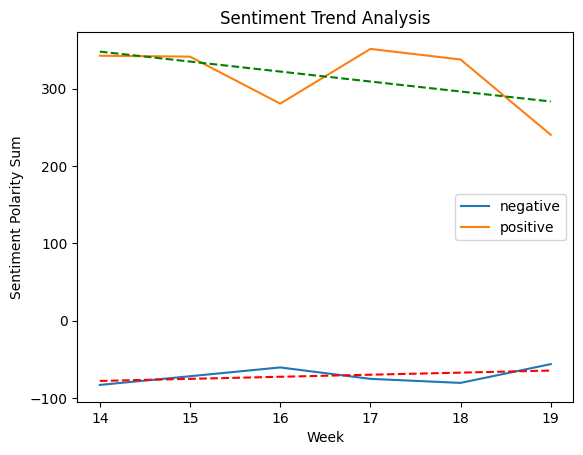

In [42]:
sentiment_counts = df.groupby(['sentiment', df['tweet_created'].dt.strftime('%W')])['sentiment_polarity'].sum().unstack(fill_value=0)

# Plot the line chart for positive and negative sentiments
ax = sentiment_counts.T.plot(kind='line')

# Set the x-axis label and title
ax.set_xlabel('Week')
ax.set_title('Sentiment Trend Analysis')

# Set the y-axis label
ax.set_ylabel('Sentiment Polarity Sum')

# Add a legend
ax.legend()

# Calculate and plot trend lines for positive and negative sentiments
x = np.arange(len(sentiment_counts.columns))
trend_positive = np.polyfit(x, sentiment_counts.T['positive'], deg=1)
trend_negative = np.polyfit(x, sentiment_counts.T['negative'], deg=1)
ax.plot(x, trend_positive[0] * x + trend_positive[1], color='green', linestyle='--', label='Positive Trend')
ax.plot(x, trend_negative[0] * x + trend_negative[1], color='red', linestyle='--', label='Negative Trend')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


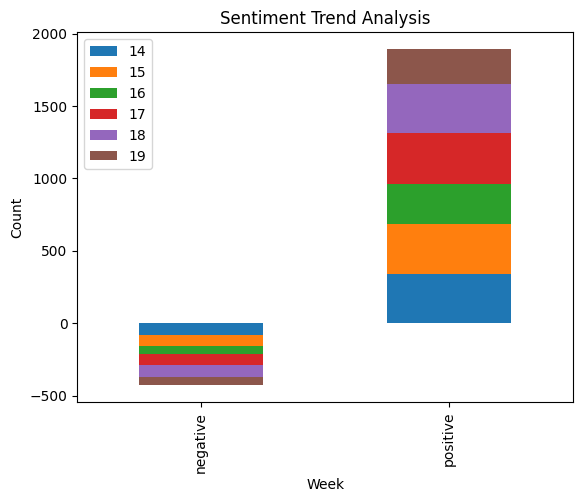

In [43]:
sentiment_counts.plot(kind='bar', stacked=True)

# Set the x-axis label and title
plt.xlabel('Week')
plt.title('Sentiment Trend Analysis')

# Set the y-axis label
plt.ylabel('Count')

# Add a legend
plt.legend()

# Show the plot
plt.show()


#Using Pretrained sentiment analysis models

In [46]:
!pip install -q transformers
#

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.7 MB/s eta 0:00:00


In [47]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = list(df["cleaned_text"])
sentimentList = sentiment_pipeline(data)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  distutils.version.LooseVersion(required_tensorflow_version)):
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2

/usr/local/lib/python3.10/dist-packages/transformers/models/open_llama/modeling_open_llama.py:42: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  logger.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [56]:
sentimentList[1:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'label': 'NEGATIVE', 'score': 0.9945264458656311},
 {'label': 'NEGATIVE', 'score': 0.978847086429596},
 {'label': 'NEGATIVE', 'score': 0.9995923638343811},
 {'label': 'NEGATIVE', 'score': 0.9928175210952759},
 {'label': 'NEGATIVE', 'score': 0.9993384480476379},
 {'label': 'NEGATIVE', 'score': 0.9977154731750488},
 {'label': 'NEGATIVE', 'score': 0.9887953996658325},
 {'label': 'NEGATIVE', 'score': 0.9875909090042114},
 {'label': 'NEGATIVE', 'score': 0.9955279231071472}]

In [57]:
sentimentList
df["transformers_setniemnt"] = [d['label'] for d in sentimentList]
df["transformers_setniemnt_score"] = [d['score'] for d in sentimentList]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Sentiment Analysis for tweets about Chatgpt using transformers pretrained model'}, ylabel='transformers_setniemnt'>

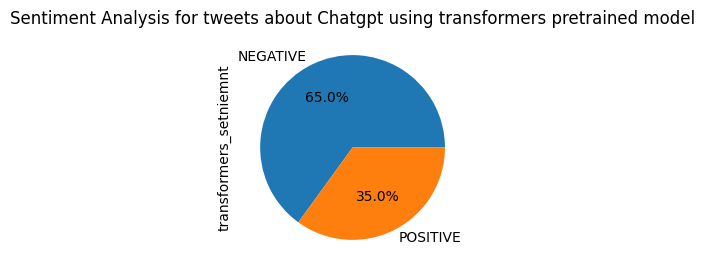

In [91]:
df["transformers_setniemnt"].value_counts().plot(kind='pie', autopct='%1.1f%%',title="Sentiment Analysis for tweets about Chatgpt using transformers pretrained model",figsize=(3,3))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


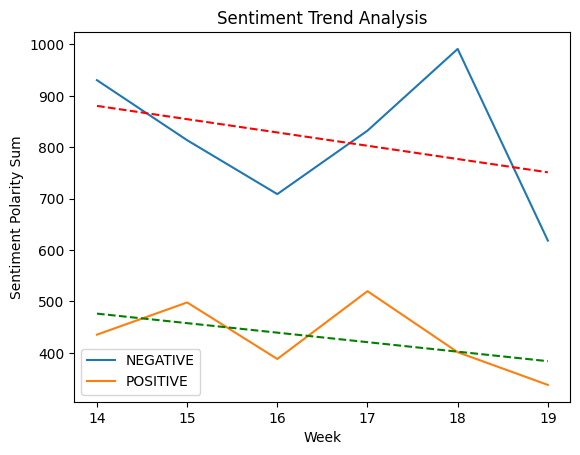

In [93]:
sentiment_counts = df.groupby(['transformers_setniemnt', df['tweet_created'].dt.strftime('%W')])['transformers_setniemnt_score'].sum().unstack(fill_value=0)

# Plot the line chart for positive and negative sentiments
ax = sentiment_counts.T.plot(kind='line')

# Set the x-axis label and title
ax.set_xlabel('Week')
ax.set_title('Sentiment Trend Analysis')

# Set the y-axis label
ax.set_ylabel('Sentiment Polarity Sum')

# Add a legend
ax.legend()

# Calculate and plot trend lines for positive and negative sentiments
x = np.arange(len(sentiment_counts.columns))
trend_positive = np.polyfit(x, sentiment_counts.T['POSITIVE'], deg=1)
trend_negative = np.polyfit(x, sentiment_counts.T['NEGATIVE'], deg=1)
ax.plot(x, trend_positive[0] * x + trend_positive[1], color='green', linestyle='--', label='Positive Trend')
ax.plot(x, trend_negative[0] * x + trend_negative[1], color='red', linestyle='--', label='Negative Trend')

# Show the plot
plt.show()

In [ ]:
!pip install swifter


In [79]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import swifter


def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []

    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass

    return ' '.join(returnVal).strip()

df["bigram_text"] = df["cleaned_text"].swifter.apply(get_ngrams, n=2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pandas Apply:   0%|          | 0/7772 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


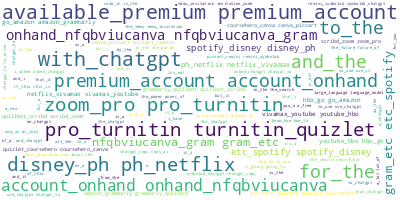

In [90]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['bigram_text'].values))
long_string = long_string.replace("chatgpt_is", '')
long_string = long_string.replace("rt_chatgpt", '')
long_string = long_string.replace("rt_the", '')

long_string = long_string.replace("hey_there", '')
long_string = long_string.replace("there_the", '')
long_string = long_string.replace("of_the", '')
long_string = long_string.replace("rt_i", '')
long_string = long_string.replace("in_a", '')
long_string = long_string.replace("with_the", '')



# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()
